# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [25]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
import nltk
nltk.downloader.download('vader_lexicon')
nltk.downloader.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
#!pip install newsapi-python


In [13]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY","491ad8c0dff144d290b336fff2bee99f")

In [14]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [15]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language= "en")

In [16]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language= "en")

In [17]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "postive": pos,
            "text": text
        })
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,compound,negative,neutral,postive,text
0,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
1,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
2,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
3,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
4,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...


In [18]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "postive": pos,
            "text": text
        })
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,compound,negative,neutral,postive,text
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
2,0.3412,0.000,0.926,0.074,Cryptocurrencies stole headlines on the first ...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [19]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,postive
count,18.000000,18.000000,18.000000,18.000000
mean,0.266894,0.039944,0.853167,0.106889
std,0.400024,0.057389,0.091525,0.068355
min,-0.585900,0.000000,0.675000,0.000000
25%,0.006450,0.000000,0.799750,0.073000
50%,0.381550,0.000000,0.857000,0.133500
75%,0.571900,0.078250,0.901500,0.150750
max,0.801600,0.176000,1.000000,0.209000


In [20]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,postive
count,19.000000,19.000000,19.000000,19.000000
mean,0.092642,0.014263,0.951000,0.034737
std,0.279880,0.028800,0.055286,0.051476
min,-0.381800,0.000000,0.845000,0.000000
25%,0.000000,0.000000,0.929000,0.000000
50%,0.000000,0.000000,0.941000,0.000000
75%,0.295600,0.000000,1.000000,0.067000
max,0.629300,0.085000,1.000000,0.155000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
# Expand the default stopwords list if necessary
sw_list = ["illustration, file, photo, representation, staffile, reuters"]


In [23]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words("english"))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    #lem = [lemmatizer.lemmatize(word) for word in words]
    
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]


In [29]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [31]:
# adding tokens to the bitcoin dataframe
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,postive,text,tokens
0,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
1,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
2,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, come, close, crypt..."
3,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, india, considering, tax, bitcoin,..."
4,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[week, shattered, yearslong, aspiration, reach..."


In [32]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,postive,text,tokens
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[security, exchange, commission, plan, sue, ri..."
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, derided, serious, investor, bubble, ..."
2,0.3412,0.000,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[cryptocurrencies, stole, headline, first, sto..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representation, virtual, currenc..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [33]:
from collections import Counter
from nltk import ngrams

In [34]:
# Generate the Bitcoin N-grams where N=2
def bi_gram_counter(text):
    big_string = ''.join(text)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = [dict(Counter(bigrams).most_common(10))]
    return pd.DataFrame(list(top_10[0].items()), columns=["bigram", "count"])

bi_gram_counter(bitcoin_df["text"])

,bigram,count
0,"(virtual, currency)",3
1,"(charsby, reuters)",3
2,"(alltime, high)",2
3,"(year, day)",2
4,"(value, bitcoin)",2
5,"(new, alltime)",2
6,"(popular, cryptocurrency)",2
7,"(reuters, stafffile)",2
8,"(stafffile, photo)",2
9,"(photo, representation)",2


In [35]:
# Generate the Ethereum N-grams where N=2
def bi_gram_counter(text):
    big_string = ''.join(text)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = [dict(Counter(bigrams).most_common(10))]
    return pd.DataFrame(list(top_10[0].items()), columns=["bigram", "count"])

bi_gram_counter(ethereum_df["text"])

,bigram,count
0,"(photo, representation)",8
1,"(representation, virtual)",8
2,"(virtual, currency)",8
3,"(currency, bitcoin)",8
4,"(illustration, taken)",8
5,"(bitcoin, seen)",6
6,"(charsfile, photo)",4
7,"(reutersdado, ruvicillustrationlondon)",4
8,"(ruvicillustrationlondon, reuters)",4
9,"(taken, november)",4


In [36]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [37]:
# Get the top 10 words for Bitcoin
btc_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
token_count(btc_tokens, N=10)

[('char', 18),
 ('bitcoin', 12),
 ('cryptocurrency', 8),
 ('year', 6),
 ('reuters', 6),
 ('value', 5),
 ('price', 5),
 ('new', 5),
 ('previous', 3),
 ('alltime', 3)]

In [38]:
# Get the top 10 words for Ethereum
eth_tokens = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
token_count(eth_tokens, N=10)

[('char', 19),
 ('bitcoin', 18),
 ('reuters', 12),
 ('currency', 10),
 ('taken', 10),
 ('photo', 8),
 ('representation', 8),
 ('virtual', 8),
 ('illustration', 8),
 ('reutersdado', 8)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [43]:
#!pip install wordcloud

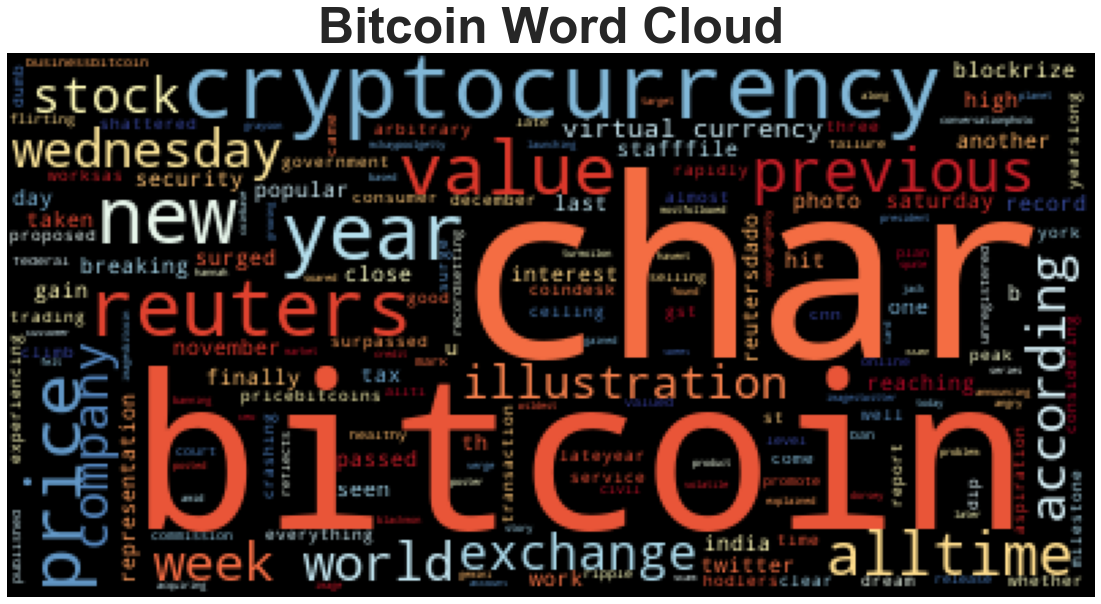

In [44]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(btc_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

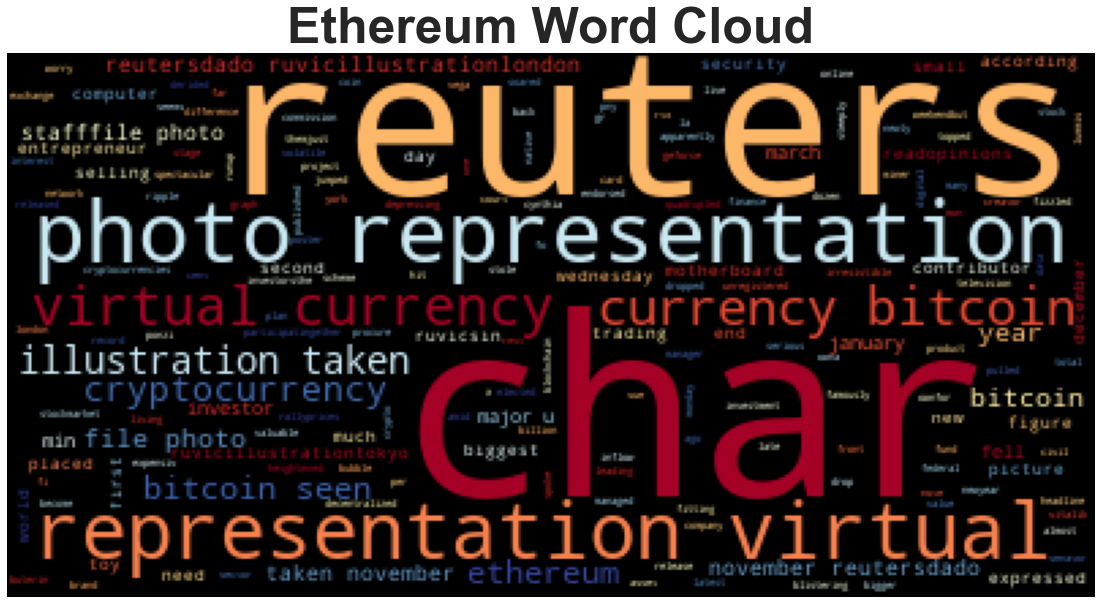

In [45]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(eth_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [48]:
import spacy
from spacy import displacy

In [49]:
#!pip install spacy

In [56]:
# Optional - download a language model for SpaCy
!python -m spacy download en#_core_web_sm


[x] No compatible model found for 'en#_core_web_sm' (spaCy v2.3.5).



In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together
bitcoin_text = " ".join(bitcoin_df.text.to_list())
print(bitcoin_text)

In [ ]:
# Run the NER processor on all of the text
bitcoin_processor = nlp(bitcoin_text)
# Add a title to the document
bitcoin_processor.user_data["title"] = "Bitcoin NER"

In [ ]:
# visualization
displacy.render(bitcoin_processor, style= "ent")

In [ ]:
# List all Entities
for ent in bitcoin_processor.ents:
    print(ent.text, ent.label_)

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
ethereum_text = " ".join(ethereum_df.text.to_list())
print(ethereum_text)
# Run the NER processor on all of the text
ethereum_processor = nlp(ethereum_text)
# Add a title to the document
ethereum_processor.user_data["title"] = "ethereum NER"

In [ ]:
# visualize 
displacy.render(ethereum_processor, style= "ent")

In [ ]:
# List all Entities
for ent in ethereum_processor.ents:
    print(ent.text, ent.label_)